In [0]:
#this notebook try to forecast corona cases
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import tensorflow as tf
print(tf.__version__)
import numpy as np



2.2.0


In [0]:
data_raw=pd.read_csv("/content/drive/My Drive/datasets/corona/case_time_series (2).csv")
data_raw

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,30 January,1,1,0,0,0,0
1,31 January,0,1,0,0,0,0
2,01 February,0,1,0,0,0,0
3,02 February,1,2,0,0,0,0
4,03 February,1,3,0,0,0,0
...,...,...,...,...,...,...,...
125,03 June,9689,216876,3789,104064,259,6088
126,04 June,9847,226723,4390,108454,274,6362
127,05 June,9472,236195,4770,113224,286,6648
128,06 June,10408,246603,5433,118657,297,6945


In [0]:
data_raw['Date']=data_raw['Date']+' '+'2020'
data_raw['Date'] =  pd.to_datetime(data_raw['Date'], format='%d %B %Y')

In [0]:
data_raw


,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,2020-01-30,1,1,0,0,0,0
1,2020-01-31,0,1,0,0,0,0
2,2020-02-01,0,1,0,0,0,0
3,2020-02-02,1,2,0,0,0,0
4,2020-02-03,1,3,0,0,0,0
...,...,...,...,...,...,...,...
125,2020-06-03,9689,216876,3789,104064,259,6088
126,2020-06-04,9847,226723,4390,108454,274,6362
127,2020-06-05,9472,236195,4770,113224,286,6648
128,2020-06-06,10408,246603,5433,118657,297,6945


In [0]:
#so now let us drop some columns :)
data_raw.drop(columns={'Total Confirmed','Total Recovered','Total Deceased'})

,Date,Daily Confirmed,Daily Recovered,Daily Deceased
0,2020-01-30,1,0,0
1,2020-01-31,0,0,0
2,2020-02-01,0,0,0
3,2020-02-02,1,0,0
4,2020-02-03,1,0,0
...,...,...,...,...
125,2020-06-03,9689,3789,259
126,2020-06-04,9847,4390,274
127,2020-06-05,9472,4770,286
128,2020-06-06,10408,5433,297


ARIMA stands for Autoregressive Integrated Moving Average and it depends on    
three key variables p, d, q to be successful.

 Those are briefly as follows:


p = number of lags / order of AR terms


d = order of differencing

q = number of lagged forecast errors / order of MA terms

But before that i have ended up in  a confusion that how i can choose columns...

so i gonna try 3 methods

1.each column as a seperate time series training and predicting that

2.the total table as a full time series (using VAR)

3.The confirm case column as seperate time series and recover column as seperate time series with confirm column as exogeneous variable and deceased column as seperate time with confirm case column and recover column as exogenous variable 

So lets try the first method

In [0]:
dt_confirm=data_raw['Daily Confirmed']

In [0]:
data_raw=pd.read_csv("/content/drive/My Drive/datasets/corona/case_time_series (2).csv")
data_raw

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,30 January,1,1,0,0,0,0
1,31 January,0,1,0,0,0,0
2,01 February,0,1,0,0,0,0
3,02 February,1,2,0,0,0,0
4,03 February,1,3,0,0,0,0
...,...,...,...,...,...,...,...
125,03 June,9689,216876,3789,104064,259,6088
126,04 June,9847,226723,4390,108454,274,6362
127,05 June,9472,236195,4770,113224,286,6648
128,06 June,10408,246603,5433,118657,297,6945


In [0]:
data_raw['Date']=data_raw['Date']+' '+'2020'
data_raw['Date'] =  pd.to_datetime(data_raw['Date'], format='%d %B %Y')

In [0]:
data_raw


,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,2020-01-30,1,1,0,0,0,0
1,2020-01-31,0,1,0,0,0,0
2,2020-02-01,0,1,0,0,0,0
3,2020-02-02,1,2,0,0,0,0
4,2020-02-03,1,3,0,0,0,0
...,...,...,...,...,...,...,...
125,2020-06-03,9689,216876,3789,104064,259,6088
126,2020-06-04,9847,226723,4390,108454,274,6362
127,2020-06-05,9472,236195,4770,113224,286,6648
128,2020-06-06,10408,246603,5433,118657,297,6945


In [0]:
#so now let us drop some columns :)
data_raw.drop(columns={'Total Confirmed','Total Recovered','Total Deceased'})

,Date,Daily Confirmed,Daily Recovered,Daily Deceased
0,2020-01-30,1,0,0
1,2020-01-31,0,0,0
2,2020-02-01,0,0,0
3,2020-02-02,1,0,0
4,2020-02-03,1,0,0
...,...,...,...,...
125,2020-06-03,9689,3789,259
126,2020-06-04,9847,4390,274
127,2020-06-05,9472,4770,286
128,2020-06-06,10408,5433,297


ARIMA stands for Autoregressive Integrated Moving Average and it depends on    
three key variables p, d, q to be successful.

 Those are briefly as follows:


p = number of lags / order of AR terms


d = order of differencing

q = number of lagged forecast errors / order of MA terms

But before that i have ended up in  a confusion that how i can choose columns...

so i gonna try 3 methods

1.each column as a seperate time series training and predicting that

2.the total table as a full time series (using VAR)

3.The confirm case column as seperate time series and recover column as seperate time series with confirm column as exogeneous variable and deceased column as seperate time with confirm case column and recover column as exogenous variable 

So lets try the first method

In [0]:
dt_confirm=data_raw['Daily Confirmed']

In [0]:
series=np.array(dt_confirm.values.tolist())
time=np.array(data_raw['Date'].values.tolist())

In [0]:
series

array([    1,     0,     0,     1,     1,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     2,     1,    22,     2,
           1,     3,     5,     9,    15,     8,    10,    10,    11,
          10,    14,    20,    25,    27,    58,    78,    69,    94,
          74,    86,    73,   153,   136,   120,   187,   309,   424,
         486,   560,   579,   609,   484,   573,   565,   813,   871,
         854,   758,  1243,  1031,   886,  1061,   922,  1371,  1580,
        1239,  1537,  1292,  1667,  1408,  1835,  1607,  1568,  1902,
        1705,  1801,  2396,  2564,  2952,  3656,  2971,  3602,  3344,
        3339,  3175,  4311,  3592,  3562,  3726,  3991,  3808,  4794,
        5049,  4628,  6154,  5720,  6023,  6536,  6667,  7111,  6414,
        5907,  7246,  7254,  8138,  8364,  8789,  7723,  8815,  9689,
        9847,  9472,

In [0]:
split_time = 100
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

window_size = 60
batch_size = 1
shuffle_buffer_size = 100


In [0]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[1:]))
    return ds.batch(batch_size)

In [0]:
def model_forecast(model, series, window_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(1).prefetch(1)
    forecast = model.predict(ds)
    return forecast

In [0]:
tf.keras.backend.clear_session()
window_size = 60
batch_size = 1
train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
print(train_set)

model = tf.keras.models.Sequential([
  
  tf.keras.layers.LSTM(60, return_sequences=True,input_shape=(60, 1)),
  tf.keras.dropout(.2)
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 1000)
])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))
optimizer = tf.keras.optimizers.SGD(lr=1e-8, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set, epochs=100, callbacks=[lr_schedule])


<BatchDataset shapes: ((None, None, 1), (None, None, 1)), types: (tf.int64, tf.int64)>
Epoch 1/100
40/40 [==============================] - 1s 20ms/step - loss: 233.8913 - mae: 234.3745 - lr: 1.0000e-08
Epoch 2/100
40/40 [==============================] - 1s 19ms/step - loss: 191.7204 - mae: 192.2165 - lr: 1.1220e-08
Epoch 3/100
40/40 [==============================] - 1s 20ms/step - loss: 158.3365 - mae: 158.8306 - lr: 1.2589e-08
Epoch 4/100
40/40 [==============================] - 1s 20ms/step - loss: 137.7949 - mae: 138.2888 - lr: 1.4125e-08
Epoch 5/100
40/40 [==============================] - 1s 20ms/step - loss: 150.8259 - mae: 151.3191 - lr: 1.5849e-08
Epoch 6/100
40/40 [==============================] - 1s 20ms/step - loss: 143.9598 - mae: 144.4466 - lr: 1.7783e-08
Epoch 7/100
40/40 [==============================] - 1s 19ms/step - loss: 144.3963 - mae: 144.8632 - lr: 1.9953e-08
Epoch 8/100
40/40 [==============================] - 1s 20ms/step - loss: 132.7357 - mae: 133.2208 - 

(1e-08, 1e-06, 0.0, 1000.0)

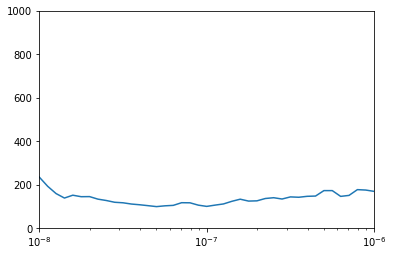

In [0]:
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-8, 1e-6, 0, 1000])

In [0]:
tf.keras.backend.clear_session()

train_set = windowed_dataset(x_train, window_size=60, batch_size=1, shuffle_buffer=shuffle_buffer_size)
model = tf.keras.models.Sequential([
  
  tf.keras.layers.LSTM(120, return_sequences=True,input_shape=(60, 1)),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 1000)
])


optimizer = tf.keras.optimizers.SGD(lr=9e-8, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set,epochs=500)

Epoch 1/500
40/40 [==============================] - 1s 20ms/step - loss: 237.0125 - mae: 237.5010
Epoch 2/500
40/40 [==============================] - 1s 20ms/step - loss: 160.2738 - mae: 160.7569
Epoch 3/500
40/40 [==============================] - 1s 21ms/step - loss: 143.8793 - mae: 144.3453
Epoch 4/500
40/40 [==============================] - 1s 20ms/step - loss: 145.5841 - mae: 146.0751
Epoch 5/500
40/40 [==============================] - 1s 20ms/step - loss: 130.6016 - mae: 131.0797
Epoch 6/500
40/40 [==============================] - 1s 20ms/step - loss: 124.8196 - mae: 125.2827
Epoch 7/500
40/40 [==============================] - 1s 19ms/step - loss: 118.7370 - mae: 119.1869
Epoch 8/500
40/40 [==============================] - 1s 20ms/step - loss: 129.4320 - mae: 129.9144
Epoch 9/500
40/40 [==============================] - 1s 20ms/step - loss: 122.2313 - mae: 122.6852
Epoch 10/500
40/40 [==============================] - 1s 19ms/step - loss: 121.5107 - mae: 121.9728
Epoch 11/

In [0]:
rnn_forecast = model_forecast(model, series[..., np.newaxis], 60)
rnn_forecast = rnn_forecast[60 - window_size:-1, -1, 0]

In [0]:
rnn_forecast

array([ 238.89189 ,  325.4935  ,  425.27338 ,  511.8395  ,  575.6111  ,
        640.267   ,  664.59247 ,  686.0419  ,  616.57477 ,  661.31104 ,
        661.44824 ,  775.0049  ,  799.76953 ,  796.89624 ,  766.8187  ,
        855.3808  ,  834.9834  ,  806.92413 ,  838.00116 ,  815.1494  ,
        863.01666 ,  869.2242  ,  856.4182  ,  868.35016 ,  859.63477 ,
        870.5569  ,  864.7924  ,  872.15283 ,  869.6716  ,  868.9573  ,
        872.49774 ,  870.93207 ,  871.791   ,  873.83936 ,  874.0523  ,
        875.1676  ,  875.2321  ,  875.10077 ,  874.73047 ,  873.7808  ,
        871.83997 ,  868.28235 ,  864.95496 ,  859.46906 ,  851.60254 ,
        839.50934 ,  822.97064 ,  795.0004  ,  751.35236 ,  691.1685  ,
        611.2204  ,  542.00653 ,  483.42328 ,  399.53427 ,  337.33377 ,
        232.23012 ,  135.18326 ,   -4.109846,  -34.880863,  -78.20271 ,
       -140.28432 , -154.17438 , -154.07042 , -153.92693 , -153.93991 ,
       -154.11429 , -154.34364 , -154.79605 , -155.04842 , -155.

In [0]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

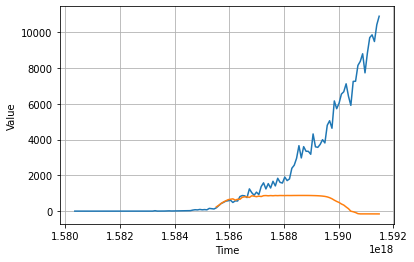

In [0]:

plot_series(time, series)
plot_series(time[60:], rnn_forecast)

ValueError: ignored

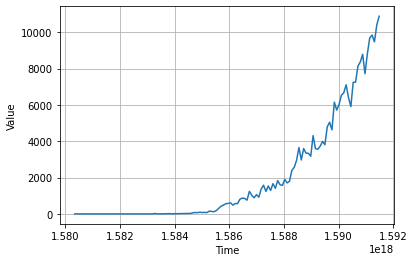

In [0]:

plot_series(time, series)
plot_series(time, rnn_forecast)

In [0]:
tf.keras.metrics.mean_absolute_error(x_valid, rnn_forecast).numpy()

5681.6343

<Figure size 432x288 with 0 Axes>

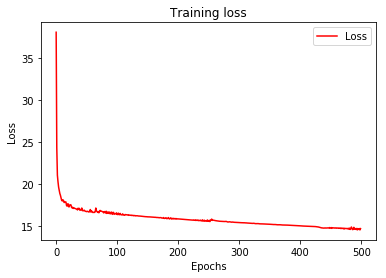

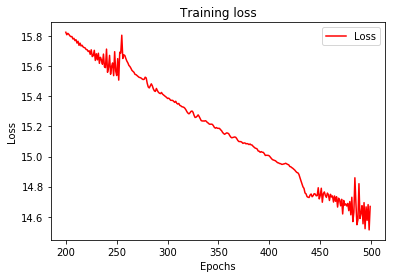

<Figure size 432x288 with 0 Axes>

In [0]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
loss=history.history['loss']

epochs=range(len(loss)) # Get number of epochs


#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r')
plt.title('Training loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss"])

plt.figure()



zoomed_loss = loss[200:]
zoomed_epochs = range(200,500)


#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(zoomed_epochs, zoomed_loss, 'r')
plt.title('Training loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss"])

plt.figure()

In [0]:
X_train = []
y_train = []
for i in range(20,130):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [0]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [0]:
regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
# Second LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Third LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Fourth LSTM layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
# The output layer
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='rmsprop',loss='mean_squared_error')
# Fitting to the training set
regressor.fit(X_train,y_train,epochs=50,batch_size=32)